<a href="https://colab.research.google.com/github/Karthikraja93/EDA/blob/main/DH_Kaggle_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

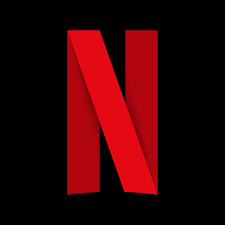


---
# **Netflix Movies & TV Shows Analysis**
---


> **Import Packages**



In [1]:
import io
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

> **Import file from local & Read the file**



*There are 7787 rows & 12 Columns*

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['netflix_titles.csv']))
df.head()

Saving netflix_titles.csv to netflix_titles (2).csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...



> **Check for Nulls**



*Nulls are present in director, cast, country, date_added, rating columns*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB




> **Extract Year from Date Addition Columns**

*It can be used to understand aggregations if any at Year Level & also can be compared with release date to understand how soon netflix is uploading content*


In [4]:
df1 = df.copy()

#Removing Dates with Nulls
df1 = df1[df1['date_added'].notna()]

df1['added_year'] = df1['date_added'].apply(lambda x: x[-4:])

> **Comparing Movie & TV Show Trend by Year Uploaded on Netflix**





Text(0.5, 1.0, 'Additions on Platform across Years')

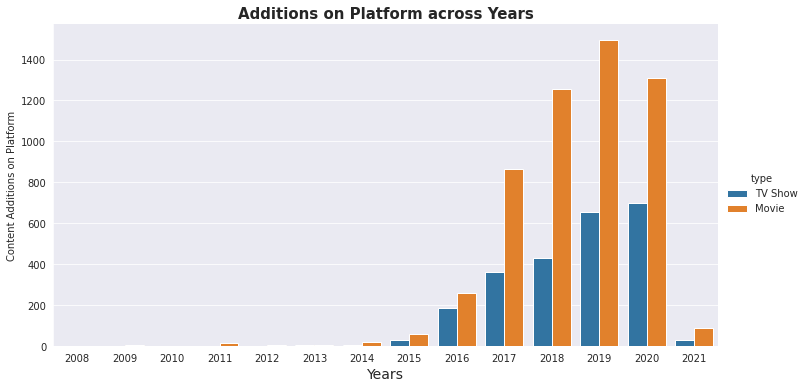

In [5]:
df1['added_year'] = df1['added_year'].astype(int)
with sns.axes_style('darkgrid'):
    g = sns.catplot(x = "added_year", hue = "type" ,data=df1, aspect=2.0,kind='count')
    g.set_ylabels("Total")

plt.xlabel('Years', fontsize=14)
plt.ylabel('Content Additions on Platform', fontsize=10)
plt.title('Additions on Platform across Years',fontsize=15, fontweight='bold')

**Key Observations**

*   Content addition (Movies & TV Shows) shows **Increasing trend** over years. Movies on the platform increased by ~6X times and TV shows by ~4X times from **2016 to 2020**

*Note: Lower movies number in 2020 can be attributed to Covid - 19. Also huge dip in 2021 is due to data availability till Apr -  2021* 

Text(0.5, 1.0, 'Additions on Platform across Months')

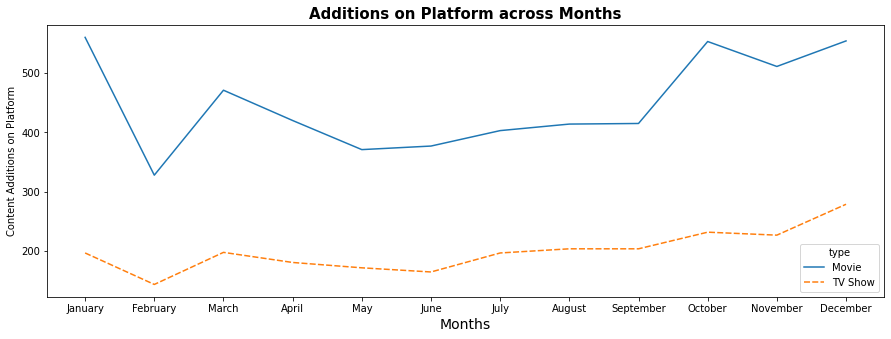

In [6]:
#Extract Month from date added
df1['month'] = df1['date_added'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()

#Aggregation at Month X Type level
month_df = df1.groupby(['month', 'type']).agg({'show_id':'count'}).rename_axis([None], axis=1).reset_index()

#Sort Month column 
months = {'January': 1,'February': 2,'March': 3,'April': 4,'May': 5,'June': 6,'July': 7,'August': 8,'September': 9,'October': 10,'November': 11,'December': 12}
month_df["month_number"] = month_df["month"].map(months)
month_df = month_df.sort_values(by=['month_number']).reset_index()


plt.figure(figsize=(15,5))
sns.lineplot(data=month_df, x="month", y="show_id", hue="type", style="type",)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Content Additions on Platform', fontsize=10)
plt.title('Additions on Platform across Months',fontsize=15, fontweight='bold')

**Key Observations**

*   Movies & TV. Shows show similar trend across months, with **peak** observed during **Oct - Jan** months (festive period across globe)



> **Ratings**





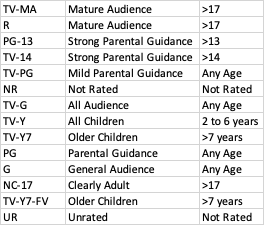

*Source - https://www.spectrum.net/support/tv/tv-and-movie-ratings-descriptions/*



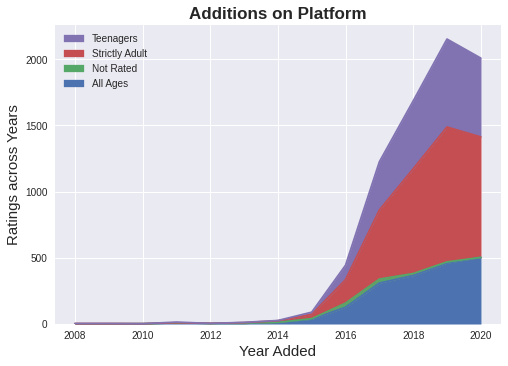

In [7]:
#Function to Bucket Ratings

def ratings_bucket(x):
    if x=='TV-MA':
        return 'Strictly Adult'
    elif x=='TV-14':
        return 'Teenagers'
    elif x=='TV-PG':
        return 'All Ages'
    elif x=='R':
        return 'Strictly Adult'
    elif x=='PG-13':
        return 'Teenagers'
    elif x=='TV-Y':
        return 'All Ages'
    elif x=='TV-Y7':
        return 'All Ages'
    elif x=='PG':
        return 'All Ages'
    elif x=='TV-G':
        return 'All Ages'
    elif x=='NR':
        return 'Not Rated'
    elif x=='G':
        return 'All Ages'
    elif x=='TV-Y7-FV':
        return 'All Ages'
    elif x=='UR':
        return 'Not Rated'
    elif x=='NC-17':
        return 'Strictly Adult'
    return 'Not Rated'

#New column with Bucketed ratings
df1['rating_bucket']=df1[['rating']].applymap(lambda x:ratings_bucket(x))


plt.style.use('seaborn')

#Excluding 2021 (since data available only till april)
df1[df1['added_year']!=2021].groupby(['added_year', 'rating_bucket'])['rating_bucket'].count().unstack().fillna(0).plot.area()
plt.xlabel('Year Added', fontsize=15)
plt.ylabel('Ratings across Years', fontsize=15)
plt.title('Additions on Platform',fontsize=17, fontweight='bold')

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0], reverse=True))
ax.legend(handles, labels)
plt.show()

**Key Observations**



*   **Strictly Adult** content is **increasing rapidly over years** & has more number of Movies/TV Shows
*   Teenagers content is comparatively slighly higher than All Ages content

> **Genre**



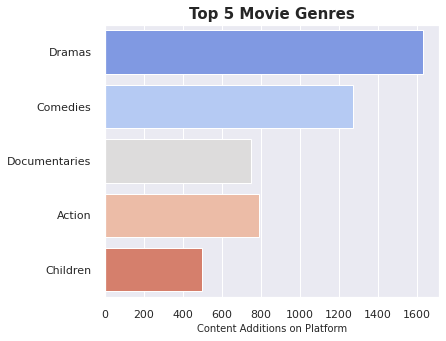

In [8]:
#
genre_df = df1.copy()
genre_df['listed_in'] = genre_df['listed_in'].replace({'International':'','TV':'','Shows':'','Movies':'',',':'','British':''},regex = True)
genre_df = genre_df.replace(np.nan, '', regex=True)
genre_df['listed_in'] = genre_df.listed_in.str.split().str.get(0)

plt.figure(figsize=(6,5))
sns.set(style="darkgrid")
ax = sns.countplot(y="listed_in", data=genre_df, palette="coolwarm", order=genre_df[genre_df['type']=='Movie']['listed_in'].value_counts().index[0:5])
plt.title('Top 5 Movie Genres', fontsize=15, fontweight='bold')
plt.xlabel('Content Additions on Platform', fontsize=10)
plt.ylabel('', fontsize=10)
plt.show()


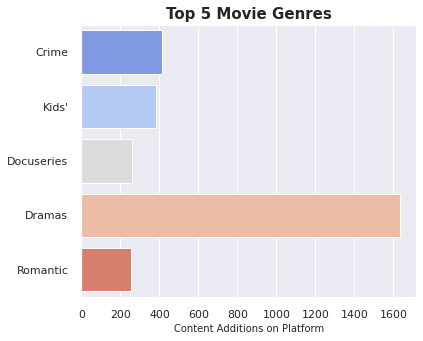

In [9]:
plt.figure(figsize=(6,5))
sns.set(style="darkgrid")
ax = sns.countplot(y="listed_in", data=genre_df, palette="coolwarm", order=genre_df[genre_df['type']=='TV Show']['listed_in'].value_counts().index[0:5])
plt.title('Top 5 Movie Genres', fontsize=15, fontweight='bold')
plt.xlabel('Content Additions on Platform', fontsize=10)
plt.ylabel('', fontsize=10)
plt.show()

In [10]:
genre_df['country'] = genre_df['country'].replace('',genre_df['country'].mode()[0])
genre_df['primary_country'] = genre_df['country'].apply(lambda x: x.split(",")[0])
primary_country_genre_df =  genre_df[(genre_df['primary_country']=='United States') | (genre_df['primary_country']=='United Kingdom') | (genre_df['primary_country']=='India') | (genre_df['primary_country']=='Canada') | (genre_df['primary_country']=='Japan')].groupby(['primary_country','listed_in'],as_index=False).agg({'show_id':'count'}).sort_values(['show_id'], ascending=[False])

#!pip install --upgrade plotly
fig = px.sunburst(primary_country_genre_df, path = ['primary_country', 'listed_in'], values = 'show_id', color = 'primary_country')
fig.update_layout(title_text='Distribution of Genres in Top 5 Countries', title_x=0.5)                  
fig.show()



> **Duration**



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



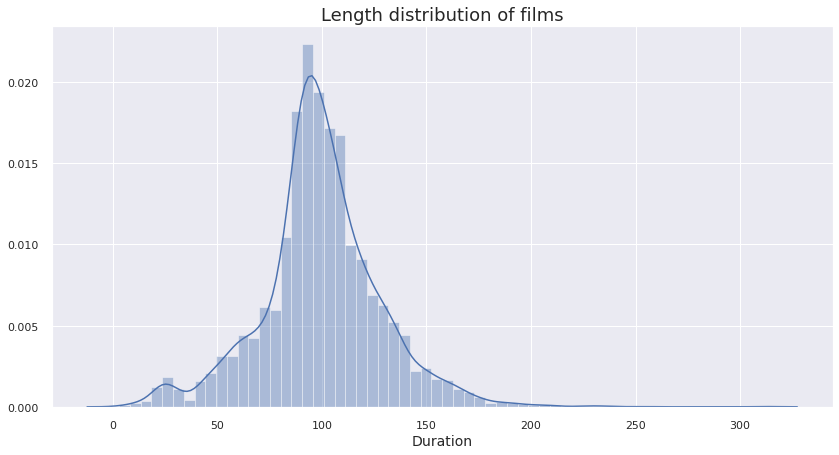

In [21]:
movies_df = df1[df1['type']=='Movie']

movies_df['durations_mins'] = [int(i.split(' ')[0]) for i in movies_df.groupby('type').get_group('Movie').duration.dropna()]
plt.figure(figsize=(14, 7))

sns.distplot(movies_df['durations_mins'], bins=60).set(ylabel=None)

plt.title('Length distribution of films', fontsize=18)
plt.xlabel('Duration', fontsize=14)
plt.show()

In [48]:
df1[df1['type']=='TV Show']['duration'].value_counts()

1 Season      1608
2 Seasons      378
3 Seasons      183
4 Seasons       86
5 Seasons       57
6 Seasons       30
7 Seasons       19
8 Seasons       18
9 Seasons        8
10 Seasons       5
12 Seasons       2
15 Seasons       2
11 Seasons       2
16 Seasons       1
13 Seasons       1
Name: duration, dtype: int64

**Session Data at Week/Day/Month**

In [ ]:
# from google.colab import  drive
# # drive.mount('/drive')
# df.groupby(['voucher_group','segment_frequency_rest']).aggregate({'orders':'sum','analytical_customer_id':'count'})

Mounted at /drive
